<p align="center">
<img src="https://1000logos.net/wp-content/uploads/2017/05/Netflix-Logo.png" width=400px>
</p>

#### NetfliX Stock Price Prediction Using machine Learning Models and Data Viz


1.   Problem Statement
2.   Data Preprocessing(Checking for null values and inconsistent data)
3.   Data Evalutation
4.   Train test splitting
5.   Modelling
6.   Hyperparameter Tuning(was Not required)
7.   Model Visualisation and testing using plots

*BY- Saumik Sarkar*


#### 1. Problem statement: Determine the closing stock prices of NFLX dataset Using Machine Learning Models So basically a Regression problem

#### 2. Data Preprocessing

In [ ]:
##importing
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [ ]:
## importing the Data csv file
data=pd.read_csv("./drive/MyDrive/NTFX dataset/NFLX.csv")

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
data.shape

(1009, 7)

SO what does my data contain?


*   Parsed Dates of Opening and closing prices
*   Price at which Stock opened
*   Today's High
*   Today's Lowest Price
*   Closing Price(Target Variable)
*   Adjacent Closing
*   Volume Of stocks

**Note** : All the currency rates were given in USD $ 💵 👀

In [ ]:
## checkign for null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### DYAMNN! No null values!: 😇

In [ ]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
data_mod=data.copy()
data_eval=data.copy()

#### 3. Data Evaluation

In [ ]:
data_eval.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
## adding a price difference column between Opening and Closing Prices
data_eval["Diff"]=data_eval['Open']-data_eval['Close'] # shifting the dataframe upwards by one place
print(data_eval['Diff'])

0        7.740005
1      -18.020004
2        2.019989
3       16.979981
4        4.380005
          ...    
1004   -25.170014
1005   -24.170014
1006    18.769989
1007    15.839996
1008    -2.860015
Name: Diff, Length: 1009, dtype: float64


In [ ]:
data_eval.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Diff
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,7.740005
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,-18.020004
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2.019989
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,16.979981
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,4.380005


#### Preprocessing not required as no null values and also there is only one object column so dropping it would not cause any harm in our training the model
##### I have decided to drop the train column and create X and Y and then do the Data Set SPlitting

#### 4. Train Test SPlit

In [ ]:
## Creating X with removed date and Close column and Adj Close column
X=data_mod.drop(columns=['Date','Close','Adj Close'],axis=1)

In [ ]:
X.head()

,Open,High,Low,Volume
0,262.000000,267.899994,250.029999,11896100
1,247.699997,266.700012,245.000000,12595800
2,266.579987,272.450012,264.329987,8981500
3,267.079987,267.619995,250.000000,9306700
4,253.850006,255.800003,236.110001,16906900


In [ ]:
Y=data_mod['Close']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((807, 4), (807,), (202, 4), (202,))

### Further on To Modelling

In [ ]:
np.random.seed(10)
model=LinearRegression(n_jobs=-1)
model.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [ ]:
model.score(X_test,Y_test)

0.9986869394740486

In [ ]:
from xgboost import XGBRegressor
model2=XGBRegressor(n_jobs=-1)
model2.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
model2.score(X_test,Y_test)

0.997243639104265

In [ ]:
model3=RandomForestRegressor(n_jobs=-1)
model3.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
model3.score(X_test,Y_test)

0.9976382821495627

#### **Note** : Best Performed by linear Regression Model


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(f"MAE: {mean_absolute_error(y_pred,Y_test)}")
print(f"R2_Score: {r2_score(Y_test,y_pred)}")
print(f"Percentage MAE {mean_absolute_error(y_pred,Y_test)*100}")
print(f"Percentage score : {r2_score(y_pred,Y_test)*100}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test,y_pred))}")

MAE: 2.8498348548364594
R2_Score: 0.9986869394740486
Percentage MAE 284.98348548364595
Percentage score : 99.8677120144152
RMSE: 4.139111513976875


In [ ]:
model.predict([[247.699997 ,	266.700012, 	245.000000 ,	12595800]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([260.92958464])

In [ ]:
y_pred[:10]

array([542.27922061, 550.15542562, 307.00669986, 492.64864294,
       372.29634954, 472.81069552, 341.83326152, 476.3807059 ,
       687.0165307 , 550.47818789])

In [ ]:
Y_test[:10]

891    543.710022
753    548.159973
452    305.160004
667    493.480011
353    375.429993
663    470.609985
253    344.709991
620    477.579987
944    688.289978
803    549.219971
Name: Close, dtype: float64

#### 7.*Model* Visualisation

In [ ]:
data_mod['Date']=pd.to_datetime(data_mod['Date'],format="%Y-%m")

#### ⬇ The actual Date VS Closing Price Plot

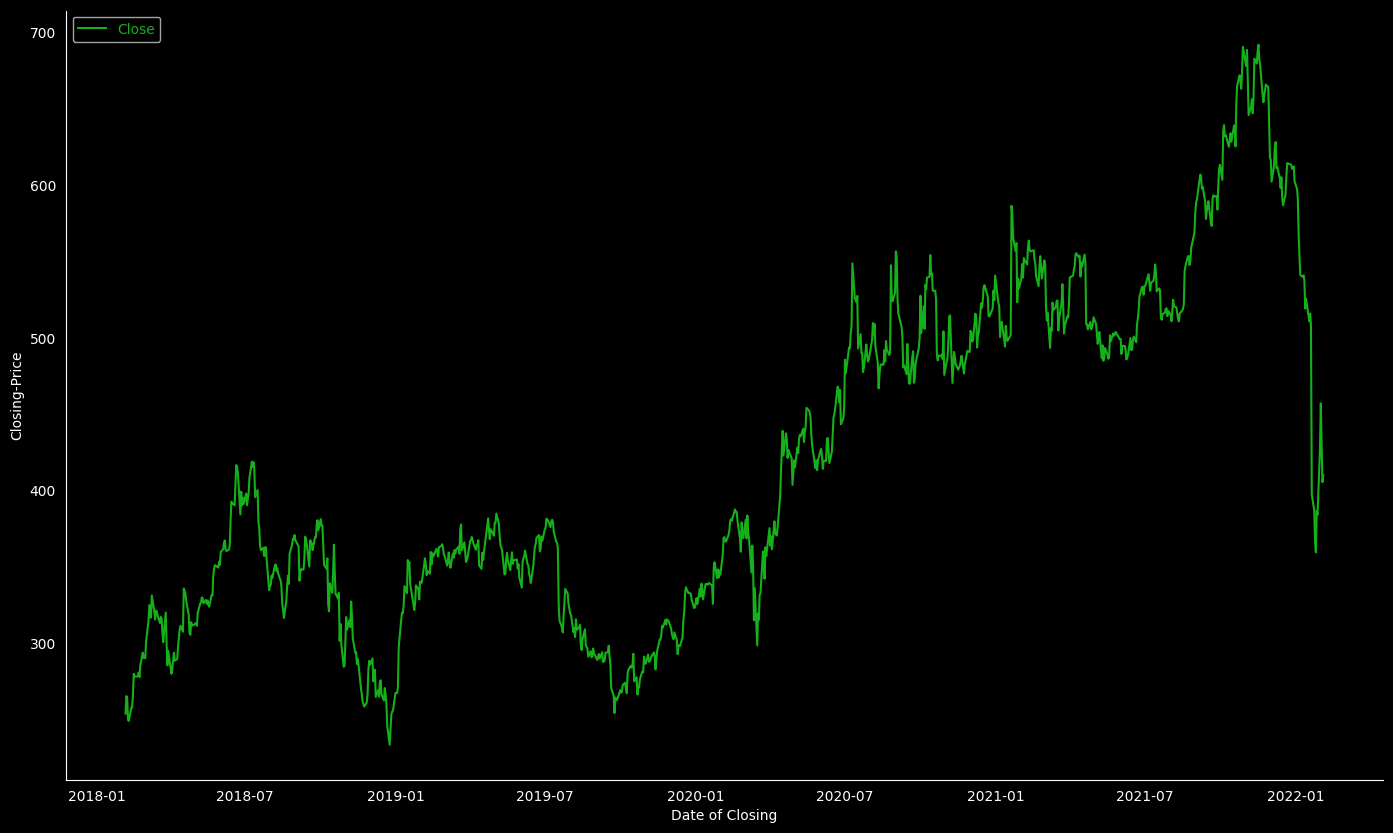

In [ ]:
plt.figure(facecolor='black', figsize=(17,10))
ax = plt.axes()
plt.xticks(color='white') #setting the xlabel as white color
plt.yticks(color='white') # setting ylabel as white color

ax.spines['left'].set_color('white')  #setting Y-axis line color to white otherwise will get mixed up in black
ax.spines['bottom'].set_color('white') ## Same with the x axis line color otherwise will get mixed up in black
plt.xlabel("Date of Closing",color='white')
plt.ylabel("Closing-Price",color='white')
ax.set_facecolor("black")  # this one i found in matplotlib docs to set the background color
plt.plot(data_mod['Date'],data_mod['Close'],color="#15B01A") # green color found in matplot lib indicating the correct stock prices
plt.legend(['Close'],labelcolor="#15B01A",facecolor="black",loc="upper left")

####  🔽 Model predictions vs actual Closing price plot

In [ ]:
y_pred_full=model.predict(X)
y_pred_full.shape,X.shape

((1009,), (1009, 4))

In [ ]:
#Scores on Full dataset

print(f"MAE on full data : {mean_absolute_error(y_pred_full,Y)}")
print(f"R2_Score: {r2_score(Y,y_pred_full)}")
print(f"Percentage MAE {mean_absolute_error(y_pred_full,Y)*100}")
print(f"Percentage score : {r2_score(y_pred_full,Y)*100}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y,y_pred_full))}")

MAE on full data : 2.850320055515578
R2_Score: 0.9987173132950972
Percentage MAE 285.0320055515578
Percentage score : 99.8713895067232
RMSE: 3.876442339140655


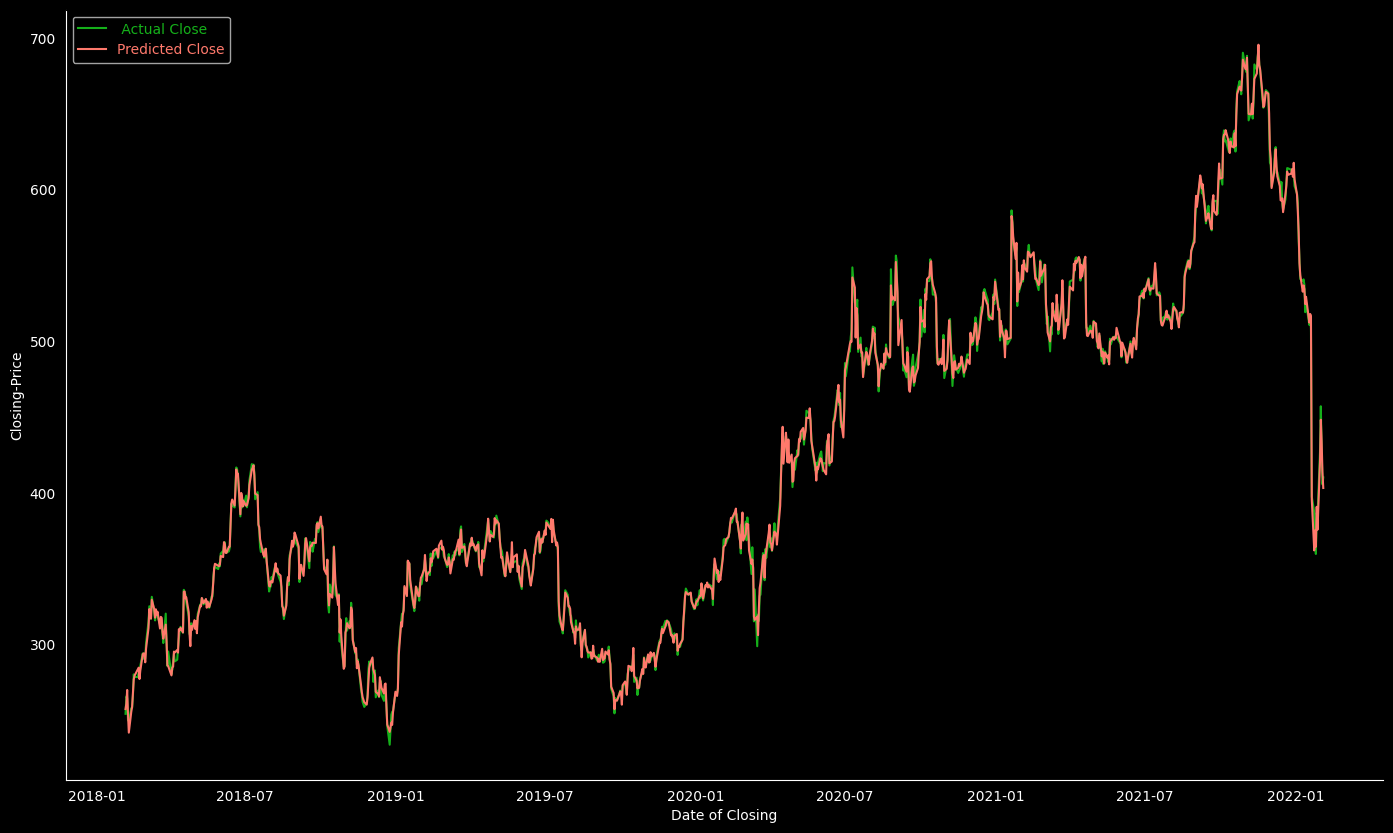

In [ ]:
plt.figure(facecolor='black', figsize=(17,10))
ax = plt.axes()
plt.xticks(color='white') #setting the xlabel as white color
plt.yticks(color='white') # setting ylabel as white color

ax.spines['left'].set_color('white')  #setting Y-axis line color to white otherwise will get mixed up in black
ax.spines['bottom'].set_color('white') ## Same with the x axis line color otherwise will get mixed up in black
plt.xlabel("Date of Closing",color='white')
plt.ylabel("Closing-Price",color='white')
ax.set_facecolor("black")  # this one i found in matplotlib docs to set the background color
plt.plot(data_mod['Date'],data_mod['Close'],color="#15B01A") ## lightgreen color
plt.plot(data_mod['Date'],y_pred_full,color="#FF796C")  # Salman color found in matplot lib indicating the correct stock prices
plt.legend([' Actual Close','Predicted Close'],labelcolor=["#15B01A","#FF796C"],facecolor="black",loc="upper left")

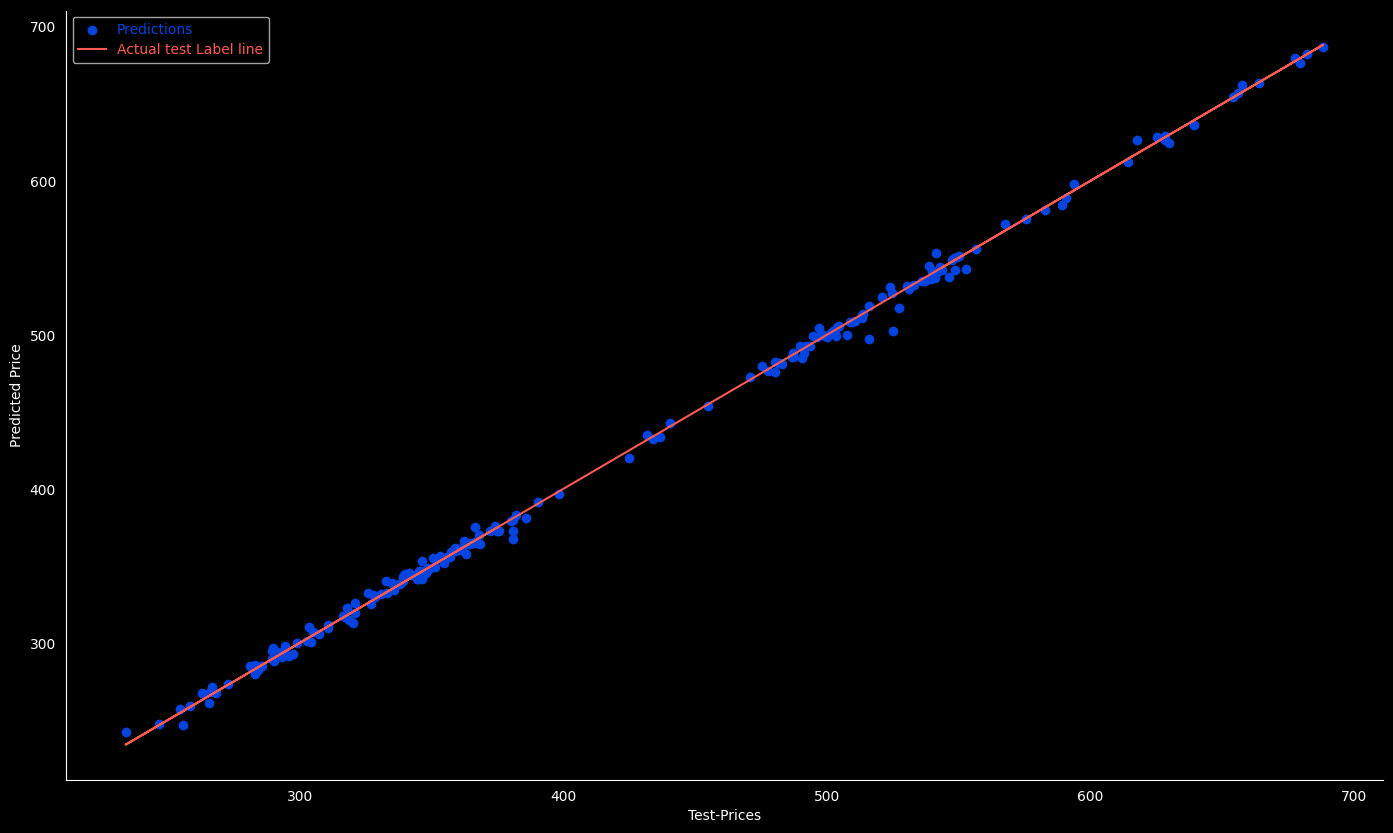

In [ ]:
## Checking the accuracy of the linear regression Model on graph
plt.figure(facecolor='black', figsize=(17,10))
ax = plt.axes()
plt.xticks(color='white') #setting the xlabel as white color
plt.yticks(color='white') # setting ylabel as white color

ax.spines['left'].set_color('white')  #setting Y-axis line color to white otherwise will get mixed up in black
ax.spines['bottom'].set_color('white')

ax.set_facecolor("black")
## Black Background

plt.scatter(Y_test,y_pred,color="#0343DF")
plt.plot(Y_test,Y_test,color="#FC5A50")

plt.xlabel('Test-Prices',color='white')
plt.ylabel('Predicted Price',color='white')

plt.legend(["Predictions","Actual test Label line"],labelcolor=['#0343DF','#FC5A50'],facecolor="black",loc="upper left")

##### Testing on random opening price and volume

In [ ]:
data_mod.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
print(f"Closing Price will be: {model.predict([[263.000000,289.899994,256.029999,	1569100]])}")

Closing Price will be: [277.43379474]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
### That's Profitable to invest rn